In [4]:
from torchvision.datasets import ImageFolder

# Eğitim veri setini yeniden yükle
train_dataset = ImageFolder(root="C:/Users/DeLL/Desktop/flowers/train")

# Sınıfları al
classes = train_dataset.classes
print(classes)  # Sınıf isimlerini ekrana yazdır



['Abutilon Çiçeği', 'Abuzambak', 'Acemi Borusu Bitkisi', 'Aconitum Fischeri', 'Afrika Papatyası', 'Ahşap Anemon Çiçeği', 'Akasma', 'Alev Çiçeği', 'Altın Otu', 'Anemon Çiçeği', 'Antoryum', 'Aslanağzı', 'Atatürk Çiçeği', 'Ateş Lalesi', 'Ay Orkidesi', 'Aynısefa Çiçeği', 'Ayyıldız Çiçeği', 'Ayçiçeği', 'Açelya', 'Balon Çiçeği', 'Bataklık Süseni', 'Begonvil', 'Bergamot', 'Beyaz Gaura Bitkisi', 'Bodrum Papatyası', 'Brovalya Çiçeği', 'California Haşhaş', 'Cattleya Orkidesi', 'Cautleya Zambak', 'Cennet Kuşu Çiçeği', 'Dağ Çiçeği', 'Deve Dikeni', 'Düğün Çiçeği', 'Ermeni Sümbülü', 'Ezan Çiçeği', 'Gazanya Çiçeği', 'Gelincik', 'Gerbera Çiçeği', 'Glayör Çiçeği', 'Guzmanya Çiçeği', 'Gül', 'Gümüş Çalısı', 'GümüşTerlik Orkidesi', 'Gündüz Sefası Çiçeği', 'Güzel Hatun Çiçeği', 'Haseki Küpesi Çiçeği', 'Hava Çiçeği', 'Havaifişek Çiçeği', 'Hercai Menekşe', 'Hint Lotusu', 'Hint Mabet Ağacı', 'Horoz İbiği Çiçeği', 'Itırşahi Çiçeği', 'Japon Gülü', 'Kadife Çiçeği', 'Kala Çiçeği', 'Kamelya Çiçeği', 'Kaplan Zambağ

C:\Users\DeLL\AppData\Local\Temp\ipykernel_11144\949867053.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("plant_recognition_model.pth

Model başarıyla yüklendi!
Tahmin edilen sınıf: Açelya


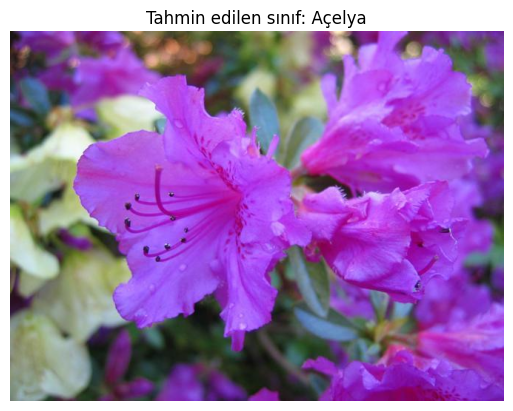

In [2]:
import os
import torch
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt

# Veri setini yükle
dataset_path = "C:/Users/DeLL/Desktop/flowers/train"  # Eğitim veri setinin yolu
train_dataset = ImageFolder(root=dataset_path)
classes = train_dataset.classes  # Sınıf isimlerini al

# Cihaz ayarı
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli yeniden tanımla
model = models.resnet18(pretrained=False)  # pretrained=False çünkü kendi ağırlıklarımızı yükleyeceğiz
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))  # Sınıf sayısını ayarla
model = model.to(device)

# Kaydedilen ağırlıkları yükle
model.load_state_dict(torch.load("plant_recognition_model.pth"))
model.eval()  # Modeli değerlendirme moduna al

print("Model başarıyla yüklendi!")

# Tahmin için görüntü dönüşümleri
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Test görüntüsünü yükle
test_image_path = "C:/Users/DeLL/Desktop/flowers/img2.jpg"  # Test edilecek görüntünün yolu
image = Image.open(test_image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # Model için batch boyutunu ekle
input_tensor = input_tensor.to(device)

# Tahmin yap
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted_class = torch.max(outputs, 1)

# Tahmin edilen sınıf
predicted_label = classes[predicted_class.item()]
print(f"Tahmin edilen sınıf: {predicted_label}")

# Tahmin edilen sınıfın görüntülerini veri setinden al
predicted_class_index = predicted_class.item()
class_folder = os.path.join(dataset_path, predicted_label)  # Tahmin edilen sınıfın klasörü

# Klasördeki ilk görüntüyü yükle
example_image_path = os.path.join(class_folder, os.listdir(class_folder)[0])
example_image = Image.open(example_image_path).convert("RGB")

# Görüntüyü göster
plt.imshow(example_image)
plt.title(f"Tahmin edilen sınıf: {predicted_label}")
plt.axis("off")
plt.show()
